In [37]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import subprocess
import os
%matplotlib inline

In [58]:
# Exploring all NVDI data that I have
data_folder = '/Users/Chiao/google-drive/projects/Galvanize/fall-foliage-finder/data/nvdi/nc/'
files = os.listdir(data_folder)

In [107]:
print 'Number of files =', len(files)
print 'Example file name:', files[0]
print 'Shape of all latitudes', lats.shape
print 'Shape of all longitudes', lons.shape
print 'Sahep of NVDI variable', var.shape

Number of files = 449
Example file name: 2002.01.01.mask.nc
Shape of all latitudes (614,)
Shape of all longitudes (927,)
Sahep of NVDI variable (614, 927)


In [81]:
nc = Dataset(data_folder+files[0], 'r')
lats = nc.variables['lat'][:]
lons = nc.variables['lon'][:]
nc.close()

data = np.zeros([len(lats), len(lons), len(files)])
for i, f in enumerate(files):
    nc = Dataset(data_folder+f, 'r')
    var = nc.variables['Band1'][:]
    data[:,:,i] = var
    nc.close()

In [82]:
data.shape

(614, 927, 449)

In [83]:
# Constructing a mask where True == somewhere in the time series there's a NaN value
is_nan = (data == -3000.)
mask = np.any(is_nan, axis=2)
mask.shape

(614, 927)

In [84]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [126]:
def plot_time_series(i, j, time_series):
    fig = plt.figure(figsize=(20,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(np.arange(len(time_series)), time_series)
    note = 'lat = {0}, lon = {1}'.format(lats[i], lons[j])
    ax.text(0.9, 2, note, fontsize=20)
    plt.show()

In [133]:
#plt.figure(figsize=(20,12))
# for i in np.arange(450, 460):
#     for j in np.arange(798, 800):
#         if not mask[i, j]:
#             time_series = data[i, j, :]
#             plot_time_series(i, j, time_series)
            

In [32]:
# Set default font size for matplotlib plots
mpl.rcParams.update({'font.size': 16})
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)

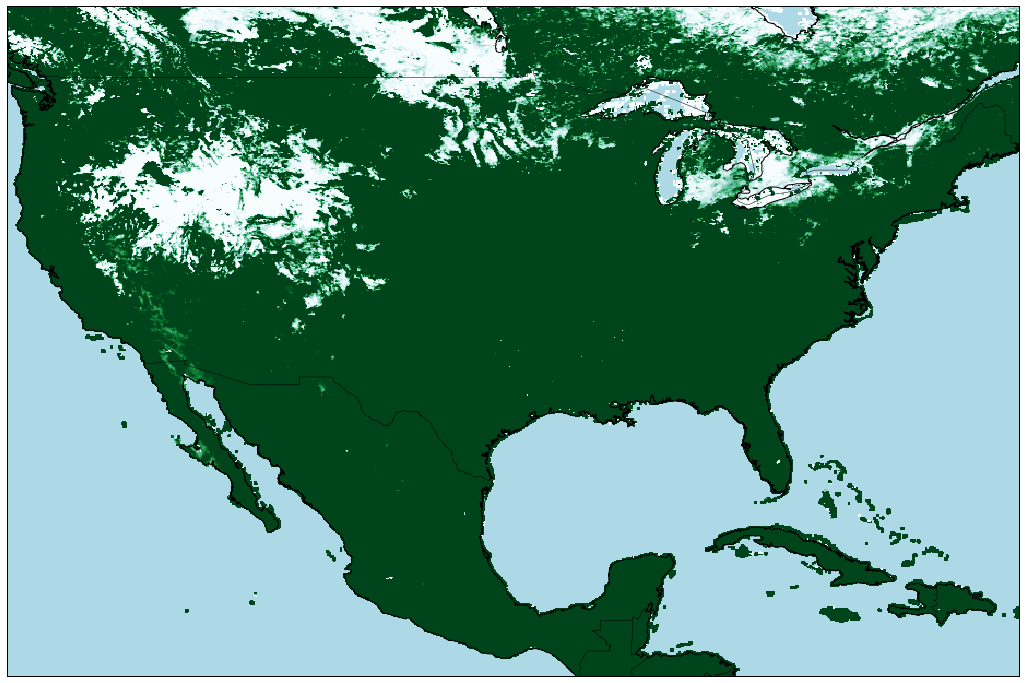

In [45]:
def plot_nvdi(lats, lons, data):
    cmap = mpl.cm.get_cmap('BuGn')
    norm = mpl.colors.Normalize(0, 10000)
    area_thresh=25000
    land_color='grey'
    ocean_color='lightblue'

    fig = plt.figure(figsize=(20,12))

    ax = fig.add_subplot(1,1,1)
    m = Basemap(projection='cyl', llcrnrlat=lats.min(), llcrnrlon=lons.min(),
            urcrnrlat=lats.max(), urcrnrlon=lons.max(), resolution='h',
            area_thresh=area_thresh)
    xi, yi = m(lons, lats)
    xi, yi = np.meshgrid(xi, yi)
    m.pcolormesh(xi, yi, var, cmap=cmap, norm=norm)
    m.drawlsmask(land_color=land_color, ocean_color=ocean_color, lakes=True)
    m.drawcountries()
    m.drawcoastlines()


In [ ]:
def cluster_locations(data):
    pass

In [136]:
veg_file = ('/Users/Chiao/google-drive/projects/Galvanize/fall-foliage-finder/data/veg.nc')
nc = Dataset(veg_file, 'r')
nc.variables

OrderedDict([(u'lon', <type 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (927,)
filling on, default _FillValue of 9.96920996839e+36 used
), (u'lat', <type 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (614,)
filling on, default _FillValue of 9.96920996839e+36 used
), (u'lev', <type 'netCDF4._netCDF4.Variable'>
float64 lev(lev)
    long_name: generic
    units: level
    axis: Z
unlimited dimensions: 
current shape = (11,)
filling on, default _FillValue of 9.96920996839e+36 used
), (u'Cv', <type 'netCDF4._netCDF4.Variable'>
float64 Cv(lev, lat, lon)
    long_name: Cv
    units: fraction
    _FillValue: 9.96920996839e+36
    missing_value: 9.96920996839e+36
    description: Fraction of grid cell covered by vegetation tile
unlimited di